In [42]:
import networkx as nx
from EoN import *
import matplotlib.pyplot as plt
import numpy as np
import scipy
import random
from collections import defaultdict

In [43]:
# Starting with building the compartmental model

# Create the underlying contact network (erdos-renyi graph)
# number of nodes
N = 1000
# From the Julia code:
# connections = .7*N*(N-1)/2
# k = 2*connections/N
# @ELLIOT see the line below about expected degree / edge probability
# assuming k is expected degree, k = 0.7*(N-1) makes for a VERY dense network where almost everyone is connected directly.
# I am going to just going to make something up for the expected degree until we clarify it.
# k = 0.7*(N-1)  # expected degree (number of connections) of a node = 7
k = 70  # expected degree (number of connections) of a node = 7
p = k / (N-1)  # edge probability.

# create the contact network
G = nx.fast_gnp_random_graph(N, p)

# Parameters for the compartmental model (from Julia notebook)
tau = 1.0 / 7.0  # testing rate
s = 0.9  # test sensitivity
epsilon = tau*s  # rate for discovery of Infected nodes [they are sent to Quarantine when discovered]
gamma_i = 0.01  # Recovery rate for Infected nodes.
gamma_q = 0.5  # Recovery rate for Quarantined individuals.
beta = 0.01  # Infection rate for the [IS] to [II] pairs

# Compartmental model is defined with two graphs, essentially representing the Figure 1 on overleaf here.
# one represents the spontaneous (like I to R) transitions.
# The other represents the induced (from edge pairs) transitions.
# Edge weights are transition rates from compartments.
H = nx.DiGraph()
H.add_node('S')  #This line is unnecessary.
H.add_edge('I', 'R', rate = gamma_i)  # Infected to Recovered
H.add_edge('I', 'Q', rate = epsilon)  # Infected to Quarantine
H.add_edge('Q', 'R', rate = gamma_q)  # Quarantine to Recovered

# Model of transitions induced by neighbor nodes
J = nx.DiGraph()
J.add_edge(('I', 'S'), ('I', 'I'), rate = beta)  #[IS] to [II], i.e. a susceptible getting infected through neighbor

# Initial states of all nodes, all S except the first few.
IC = defaultdict(lambda: 'S')
for node in range(20):
    IC[node] = 'I'

# Tell the simulation what variables to return
return_statuses = ('S', 'I', 'R', 'Q')

In [44]:
# Run the simulation
t, S, I, R, Q = EoN.Gillespie_simple_contagion(G, H, J, IC, return_statuses, tmax = float('Inf'))

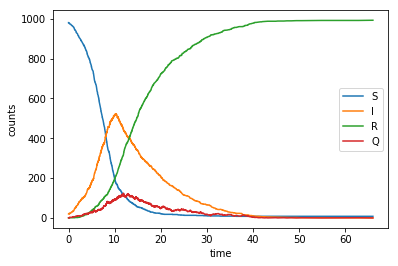

In [47]:
# plot the results

plt.plot(t, S, label = 'S')
plt.plot(t, I, label = 'I')
plt.plot(t, R, label = 'R')
plt.plot(t, Q, label = 'Q')
# plt.clf()
plt.legend()
plt.xlabel('time')
plt.ylabel('counts')
plt.savefig('SIRQ.png')
plt.show()

In [46]:
t

array([0.00000000e+00, 5.87409277e-02, 6.85059674e-02, ...,
       5.48224075e+01, 6.28641671e+01, 6.59754078e+01])